In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset from CSV
df = pd.read_csv('Housing.csv')

In [4]:
# Let's take a quick look at the first few rows of the dataset
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
# Summary statistics of the dataset
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [6]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


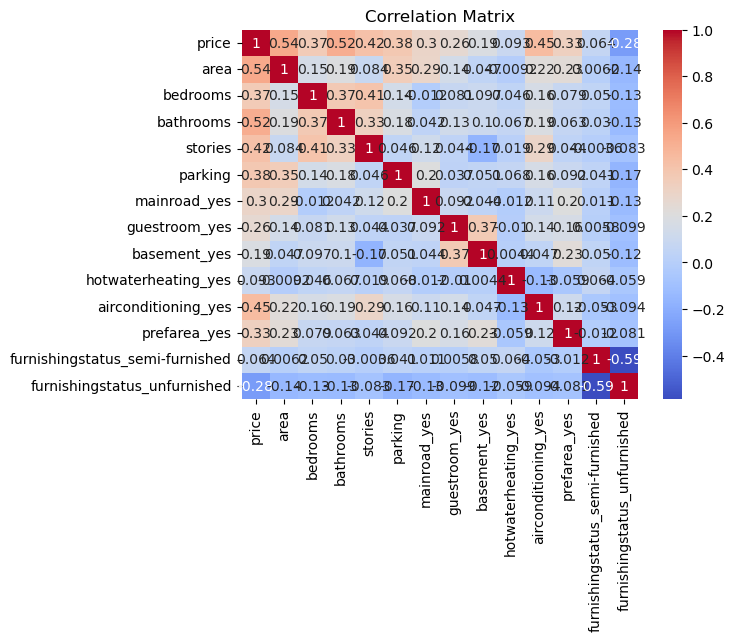

In [7]:
#Plot the correlation matrix
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Preprocessing: Selecting features and target variable
X = df_encoded[['area', 'bathrooms', 'stories', 'airconditioning_yes', 'bedrooms', 'parking']]
y = df_encoded['price']

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [10]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1052731392930.4615
R-squared: 0.6904520194187069


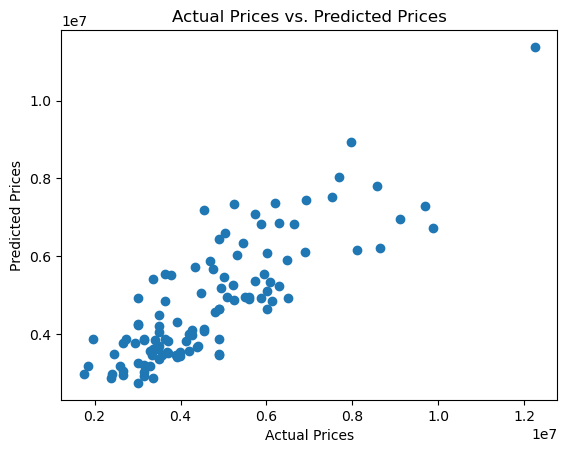

In [12]:
# To visualize the predictions against actual prices, we'll use a scatter plot (testing set)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

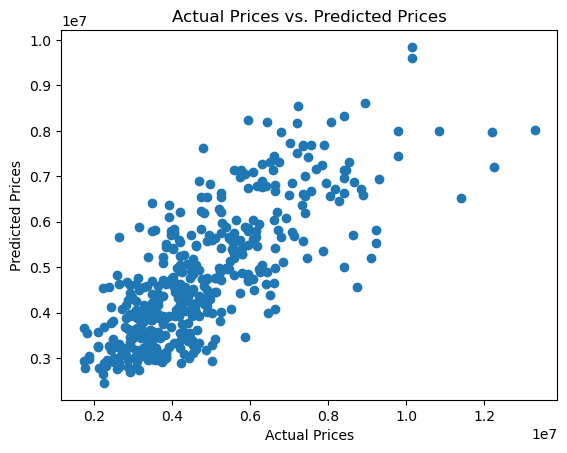

In [13]:
# To visualize the predictions against actual prices, we'll use a scatter plot (training set)
plt.scatter(y_train, model.predict(X_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [14]:
print('Variance score: %.2f' % model.score(X_test, y_test))

Variance score: 0.69


In [15]:
print('Variance score: %.2f' % model.score(X_train, y_train))

Variance score: 0.59


In [16]:
print(X_test,y_test)

     area  bathrooms  stories  airconditioning_yes  bedrooms  parking
333  3000          1        2                    0         3        0
37   9000          2        4                    1         4        2
396  3640          1        1                    0         2        1
494  6800          1        1                    0         2        0
536  3420          1        2                    0         5        0
..    ...        ...      ...                  ...       ...      ...
269  3900          1        2                    0         3        0
472  3630          1        2                    0         4        3
521  3635          1        1                    0         2        0
145  5000          1        4                    0         3        0
244  5320          1        2                    0         3        0

[109 rows x 6 columns] 333    3920000
37     7980000
396    3500000
494    2730000
536    1960000
        ...   
269    4375000
472    3010000
521    2408000
1